# Visually inspect lots 

In [3]:
from skimage.transform import resize as sk_resize
# Import Libaries
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('ggplot')
from matplotlib import colors
from matplotlib import gridspec
from matplotlib.ticker import StrMethodFormatter
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
# Data was generated with pandas 1.1.3 & uses pickle protocol 5 as default
df1 = pd.read_pickle('WM-clean.pkl')

# Dictionary of XKCD color map
cm_xkcd = colors.XKCD_COLORS.copy()
# make a color map of fixed colors - blue passing die, fuchsia failing die
cmap = colors.ListedColormap([cm_xkcd['xkcd:white'], cm_xkcd['xkcd:azure'], cm_xkcd['xkcd:fuchsia']])

# Generate a pd.Series of lots w/ 25 wafers in DF1
full_lots_df1 = (df1.groupby('lotName').count().waferMap == 25).index[df1.groupby('lotName').count().waferMap == 25].to_series()

In [4]:
def plot_lot(lot, img_dims=[30, 30], fig_size=(10, 10), resize=False):
    """
    Helper function to plot entire lot of wafers from df1
    
    :param lot: -> str | lotName that will be plotted e.g. 'lot1'
    :param img_dims: -> tuple (x,y) to adjust the overall figure size
    :param fig_size: -> list [x,y] pixles to resize the image to
    :param resize: -> bool | Resize the image to `img_dims` if True 
    """
    lot_df = df1[df1['lotName'] == lot]
    lot_df.reset_index(drop=True, inplace=True)

    total_rows = len(lot_df.index)
    ax_cnt = 5

    fig, axs = plt.subplots(ax_cnt, ax_cnt, figsize=fig_size)
    # make a color map of fixed colors - blue passing die, fuchsia failing die
    cmap = colors.ListedColormap(
        [cm_xkcd['xkcd:white'], cm_xkcd['xkcd:azure'], cm_xkcd['xkcd:fuchsia']])

    # Nested for loops to loop through all digits and number of examples input for ploting
    for n_row in range(total_rows):
        img = lot_df.waferMap[n_row]
        if resize:
            img = sk_resize(img*1024, img_dims, anti_aliasing=True)

        # imshow to plot image in axs i,j loaction in plot
        i = n_row % ax_cnt
        j = int(n_row/ax_cnt)
        axs[i, j].imshow(img,
                         interpolation='none',
                         cmap=cmap)
        axs[i, j].axis('off')
        
        # label the figure with the lot# and defect classification [for future reference]
        if i == 0 and j == 2:
            axs[i, j].set_title(f'{lot}\n{lot_df.failureType[n_row]}')
        else:
            axs[i, j].set_title(f'{lot_df.failureType[n_row]}', fontsize=9)

    plt.show()


def plot_n(n=5, img_dims=[30, 30], fig_size=(10, 10)):
    """
    Helper function to plot n random full lots 
    (lot contains all 25 wafers) from df1
    
    :param n: number of lots to plot
    :param img_dims: -> tuple (x,y) to adjust the overall figure size
    :param fig_size: -> list [x,y] pixles to resize the image to
    :returns: -> dict {i: lotname} of the lots that were plotted
    """
    lots_used = {}
    for _, lot in enumerate(full_lots_df1.sample(n).tolist()):
        lots_used[_] = lot
        print(f'[{_}] - {lot}')
        plot_lot(lot, resize=True, fig_size=fig_size)
    
    return lots_used

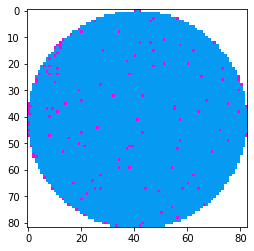

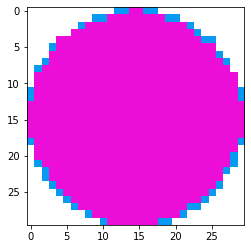

In [5]:
# example
d12 = df1[df1['lotName'] == 'lot15471'].iloc[0].waferMap
d123 = sk_resize(d12*1024,[30,30], anti_aliasing=True)
plt.imshow(d12, interpolation='none',cmap=cmap);
plt.show()
plt.imshow(d123, interpolation='none',cmap=cmap);
plt.show()

In [6]:
np.around(d123[0],2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.01, 0.02, 0.02, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

[0] - lot42823


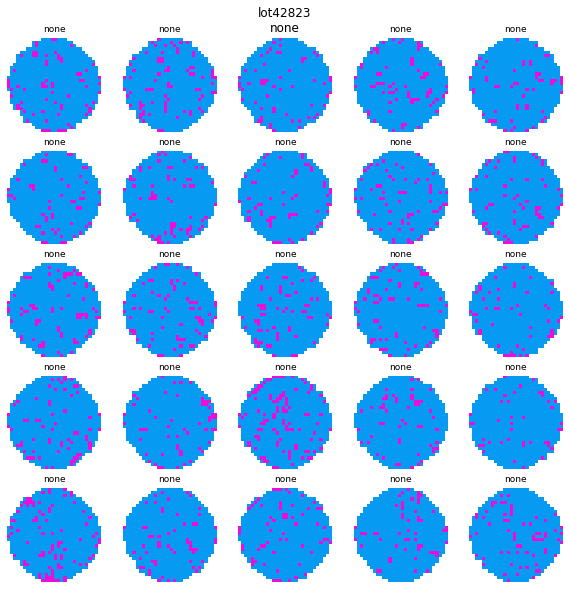

[1] - lot42050


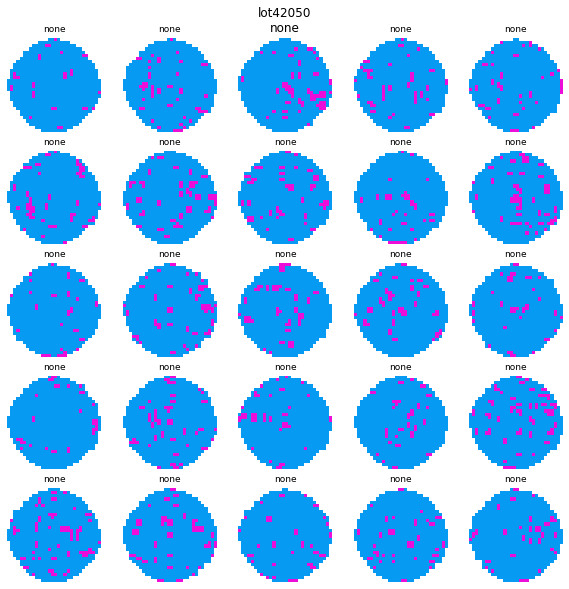

[2] - lot42190


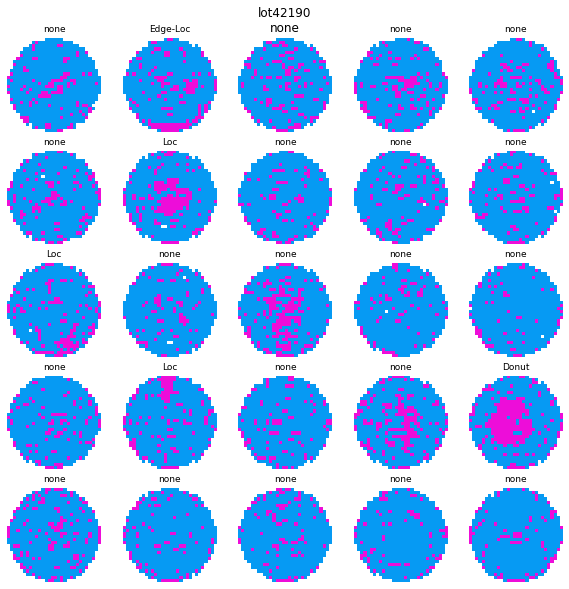

[3] - lot42137


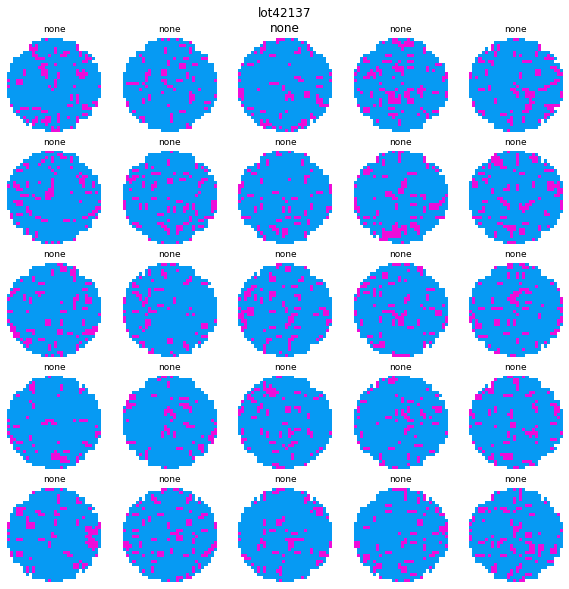

[4] - lot43647


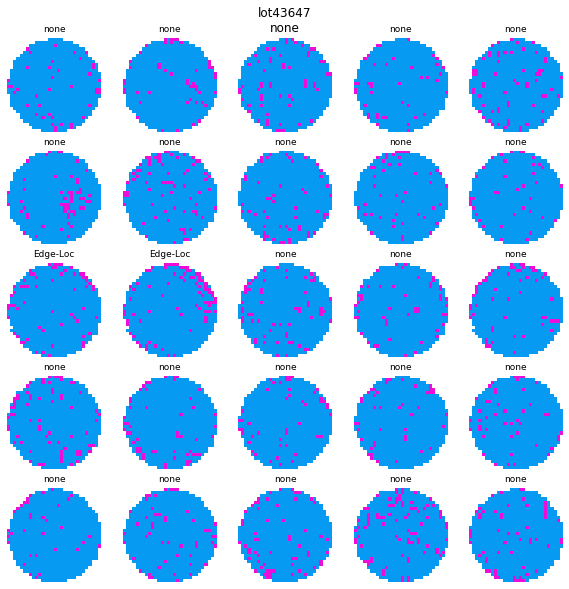

In [7]:
# display images w/ compression to 30x30
lots_used = plot_n()

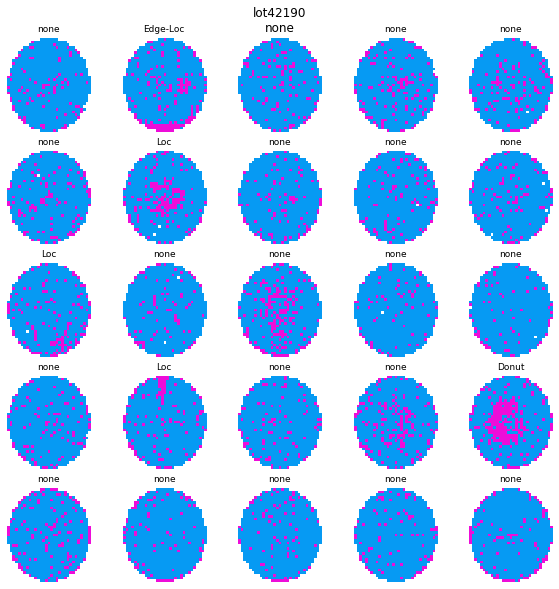

In [8]:
plot_lot(lots_used[2])

[0] : lot42823


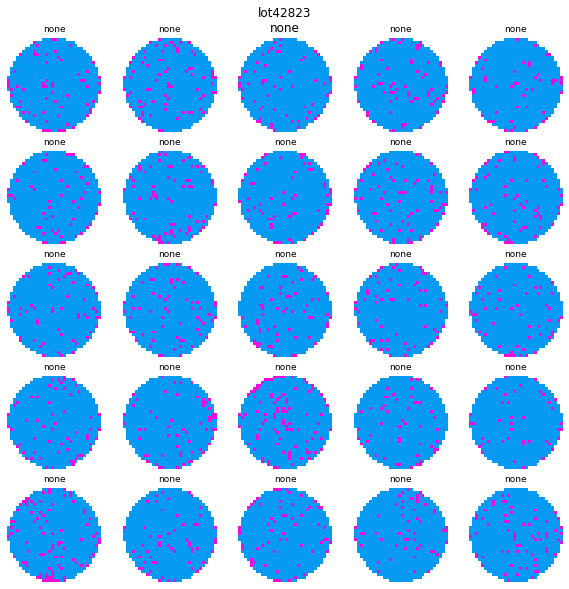

[1] : lot42050


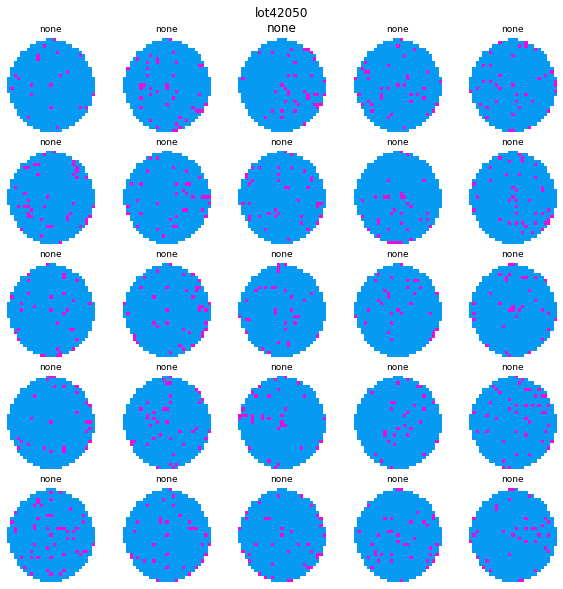

[2] : lot42190


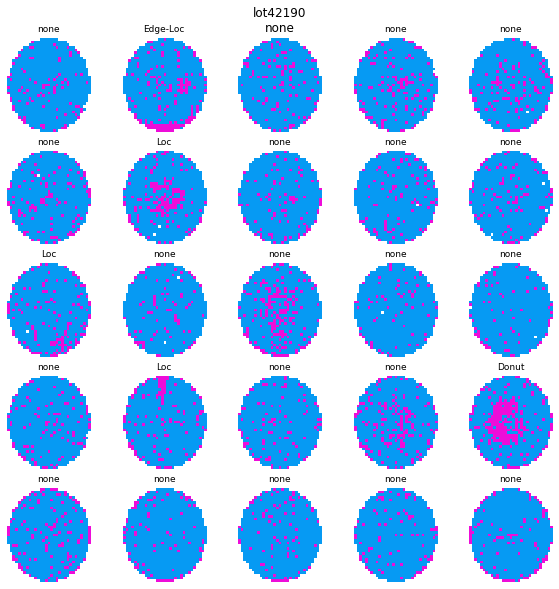

[3] : lot42137


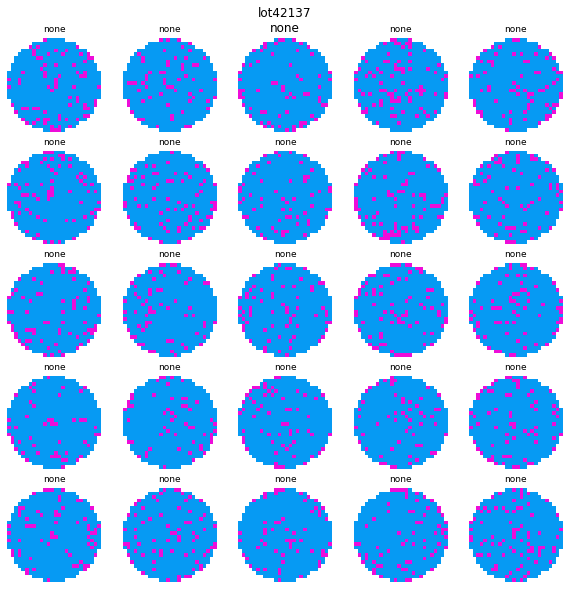

[4] : lot43647


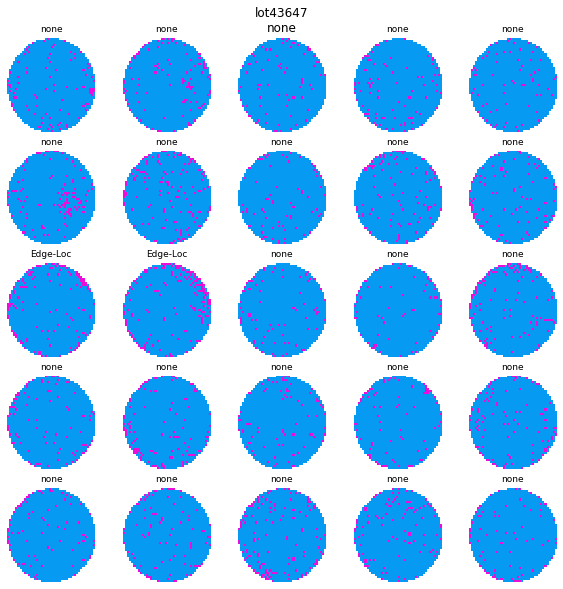

In [9]:
# display images w/o compression to 30x30
for i, lot in lots_used.items():
    print(f"[{i}] : {lot}")
    plot_lot(lot)
    plt.show()

[30x30]


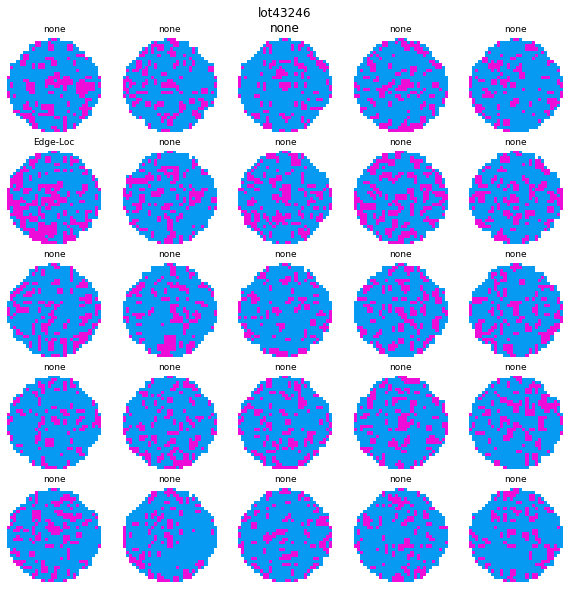

(25, 27)


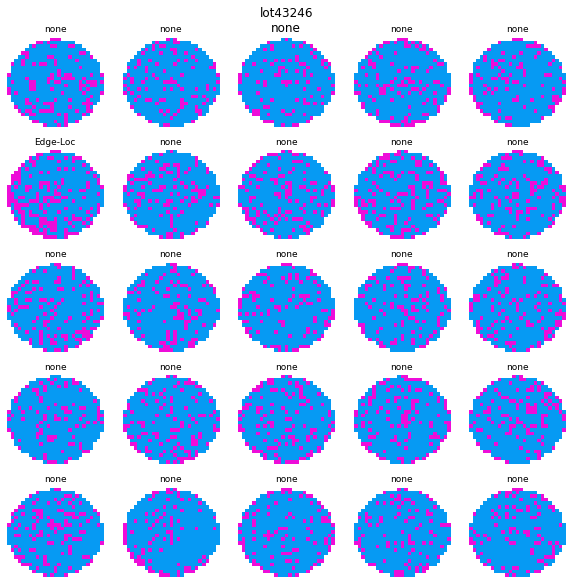

[60x60]


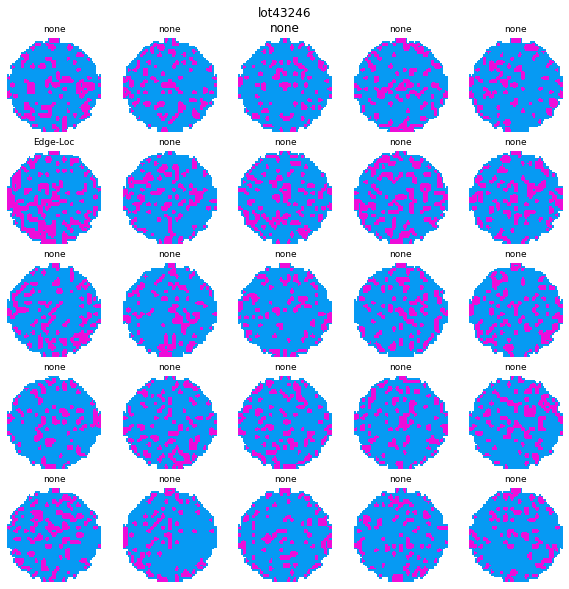

In [10]:
lot = 'lot43246'
print('[30x30]')
plot_lot(lot, resize=True, img_dims=[30,30], fig_size=[10,10])
print(f"{df1[df1.lotName == lot]['shape'].iloc[0]}")
plot_lot(lot, fig_size=[10,10])
print('[60x60]')
plot_lot(lot, resize=True, img_dims=[60,60], fig_size=[10,10])

[30x30]


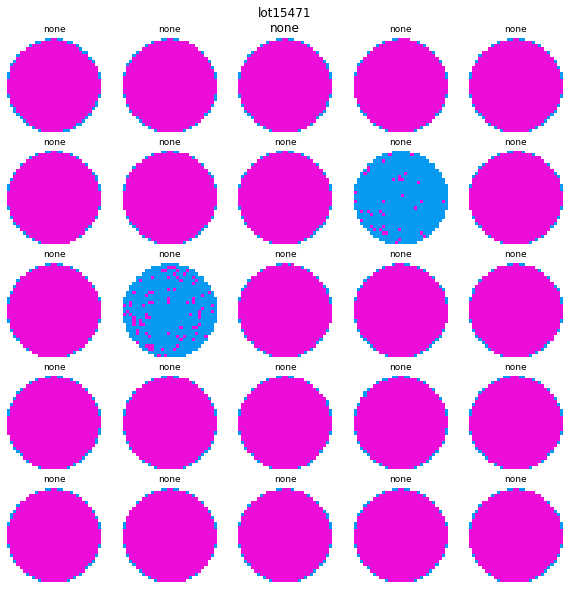

(82, 83)


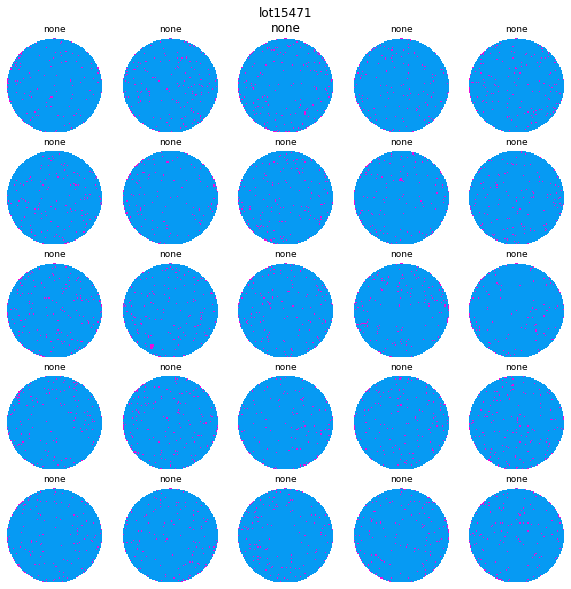

[60x60]


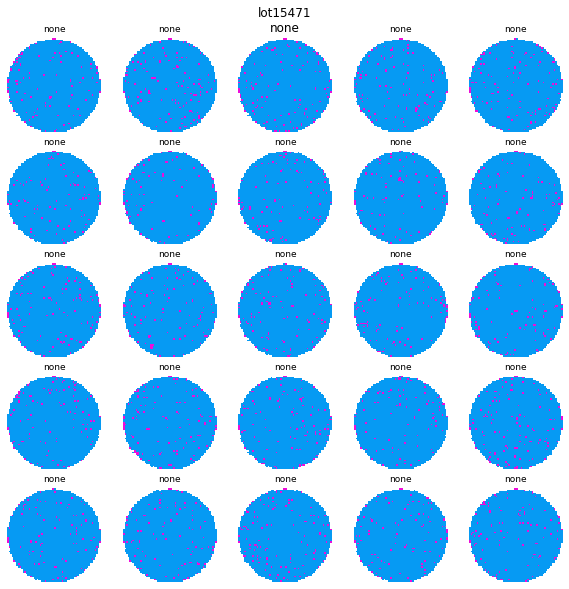

In [11]:
lot = 'lot15471'
print('[30x30]')
plot_lot(lot, resize=True, img_dims=[30,30], fig_size=[10,10])
print(f"{df1[df1.lotName == lot]['shape'].iloc[0]}")
plot_lot(lot, fig_size=[10,10])
print('[60x60]')
plot_lot(lot, resize=True, img_dims=[60,60], fig_size=[10,10])

# Data Pre-processing

In [12]:
# df1['WM'] = df1.apply(lambda x: sk_resize(x.waferMap,[60,60], anti_aliasing=True), axis=1)

In [13]:
# df1.to_pickle('WM2.pkl')

In [5]:
del df1
df1 = pd.read_pickle('WM2.pkl')

In [18]:
t1 = df1['WM'].iloc[0]
t2 = df1['waferMap'].iloc[0]
t3 = sk_resize(t2,[60,60], anti_aliasing=True)

plt.imshow(t1, interpolation='none',cmap=cmap);
plt.show()
plt.imshow(t2, interpolation='none',cmap=cmap);
plt.show()
plt.imshow(t3, interpolation='none',cmap=cmap);
plt.show()

In [7]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(60, 60, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(9, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

2022-02-11 23:20:46.751109: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-11 23:20:46.864415: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-11 23:20:46.864746: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-11 23:20:46.866488: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

In [8]:
train_df = df1[df1.dataset == 'train']
test_df = df1[df1.dataset == 'dev']

In [9]:
keep_nones = train_df[train_df.failureType == 'none'].sample(3000,random_state=42).index
train_df = pd.concat([train_df[train_df.failureType != 'none'], train_df.loc[keep_nones]]).reset_index(drop=True)
train_df.failureType.value_counts()

Edge-Ring    6776
Edge-Loc     3632
Center       3006
none         3000
Loc          2515
Scratch       835
Random        606
Donut         389
Near-full     104
Name: failureType, dtype: int64

In [14]:
train_df_size = train_df.shape[0]

x_train = np.concatenate(train_df.WM.values).ravel().reshape(train_df_size, 60, 60)
y_train = np.concatenate(train_df.labels.values).ravel().reshape(train_df_size, 9)

x_train = np.expand_dims(x_train, axis=-1)
# y_train = np.expand_dims(y_train, axis=-1)

In [15]:
print(f'{x_train.shape}\n{y_train.shape}')

(20863, 60, 60, 1)
(20863, 9)


In [16]:
y_train[0].shape

(9,)

In [ ]:
# x_train = tf.convert_to_tensor(train_df.WM.values, dtype=np.float32)
# y_train = tf.convert_to_tensor(train_df.labels.values, dtype=np.float32)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1843328   
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 1

In [17]:
model.fit(x=x_train,y=y_train,batch_size=300,epochs=10,validation_split=0.1)

Epoch 1/10


2022-02-11 23:21:55.641466: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 270374400 exceeds 10% of free system memory.
2022-02-11 23:21:55.760764: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 270374400 exceeds 10% of free system memory.


TypeError: 'NoneType' object is not callable

In [63]:
te = np.expand_dims(np.expand_dims(test_df.WM.iloc[2000],-1),0)

In [61]:
te = test_df.WM.iloc[2000]

In [64]:
model.predict(te)

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32)